# Create projections with PCA and UMAP

## Imports

In [ ]:
from pathlib import Path

import pandas as pd

from nbconverted import analysis_utils as au

## Find the root directory of the repo regardless of repo location on system

In [ ]:
# Get the current working directory
cwd = Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

## Specify data paths

In [ ]:
plates = {}
fs_data_path = (
    f"{root_dir}/nf1_painting_repo/3.processing_features/data/feature_selected_data"
)

plates["1"] = {"path": Path(fs_data_path) / "Plate_1_sc_norm_fs.parquet"}

out_path = Path("figures")

if not out_path.exists():
    out_path.mkdir(parents=True, exist_ok=True)

## Filter data

In [ ]:
# Remove metadata columns and create a label column for each plate
for plate, vals in plates.items():
    # Read the parquet
    platedf = pd.read_parquet(vals["path"])

    # Remove Metadata
    feat_col = [
        col
        for col in platedf.columns
        if "Metadata" not in col or "Metadata_genotype" in col
    ]

    platedf = platedf[feat_col]

    # Create a label column
    platedf["labels"] = platedf["Metadata_genotype"] + plate
    platedf.drop(["Metadata_genotype"], axis=1, inplace=True)

    # Assign the dataframe to a dictionary
    plates[plate]["df"] = platedf

plate1df = plates["1"]["df"]

## Visualization

Installed tk event loop hook.
Explained variance in PC1 and PC2 = 0.23253578397223595


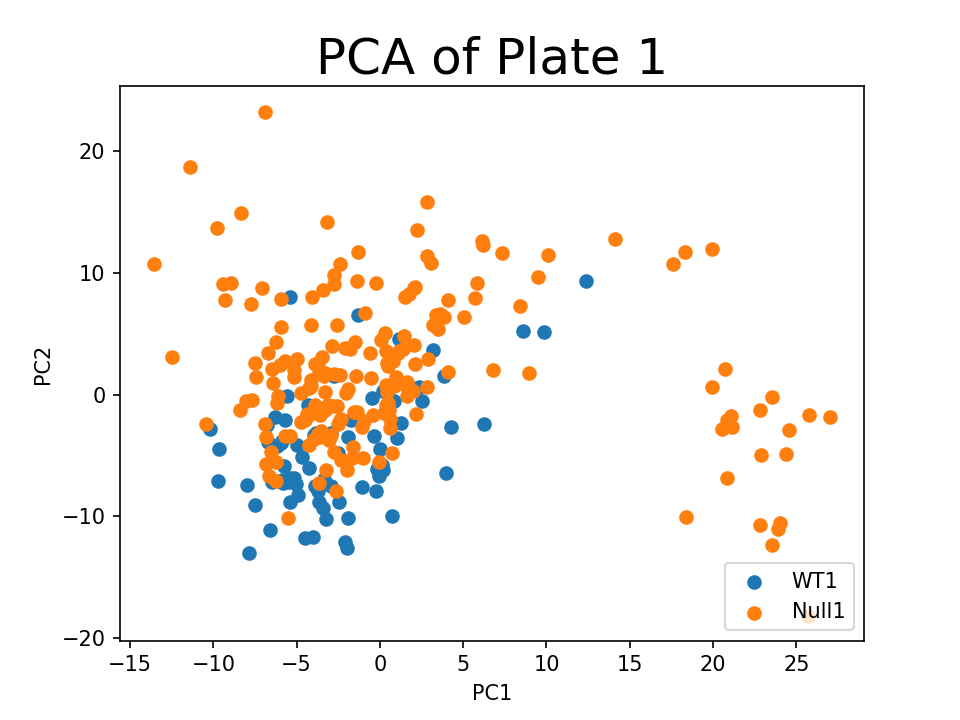

In [1]:
save_args = {"fname": out_path / "pca_plate1"}
au.plot_pca(
    feats=plate1df.drop("labels", axis=1),
    labels=plate1df["labels"],
    save_args=save_args,
    title="PCA of Plate 1",
)

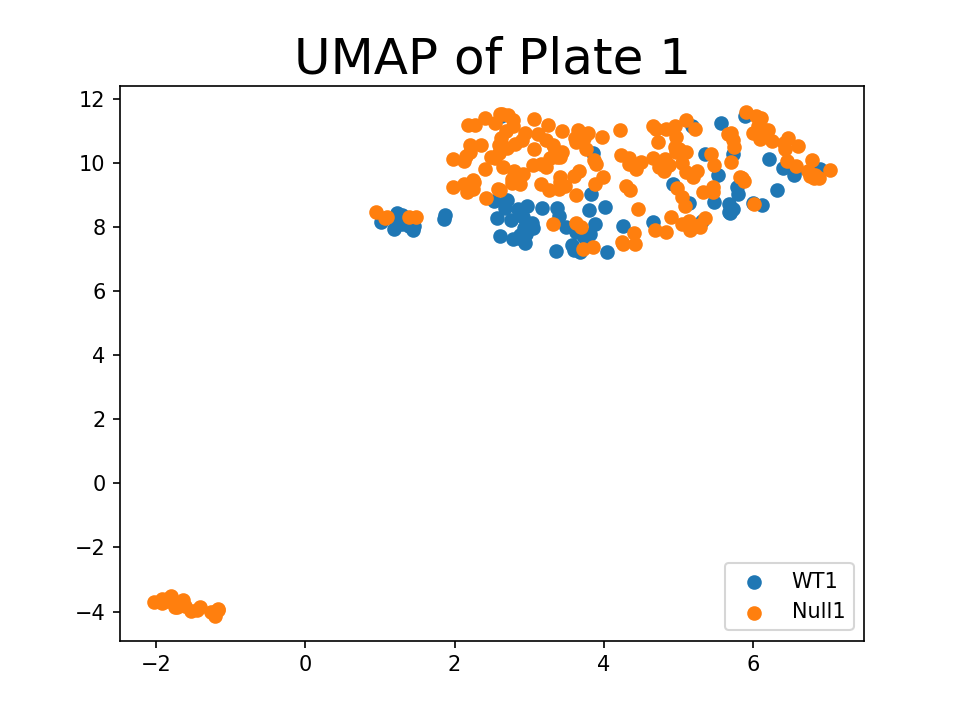

In [2]:
save_args = {"fname": out_path / "umap_plate1"}
au.plot_umap(
    feats=plate1df.drop("labels", axis=1),
    labels=plate1df["labels"],
    save_args=save_args,
    title="UMAP of Plate 1",
)